**Dataset**
---
Social Media vs Productivity

In [1]:
# Install dependencies as needed:
# pip install kagglehub[pandas-datasets]
import kagglehub
from kagglehub import KaggleDatasetAdapter

# Set the path to the file you'd like to load
file_path = "social_media_vs_productivity.csv"

# Load the latest version
df = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "mahdimashayekhi/social-media-vs-productivity",
  file_path,
  # Provide any additional arguments like
  # sql_query or pandas_kwargs. See the
  # documenation for more information:
  # https://github.com/Kaggle/kagglehub/blob/main/README.md#kaggledatasetadapterpandas
)

print("First 5 records:", df.head())

/tmp/ipython-input-585608717.py:10: DeprecationWarning: Use dataset_load() instead of load_dataset(). load_dataset() will be removed in a future version.
  df = kagglehub.load_dataset(


100%|██████████| 5.31M/5.31M [00:00<00:00, 63.8MB/s]


First 5 records:    age  gender    job_type  daily_social_media_time  \
0   56    Male  Unemployed                 4.180940   
1   46    Male      Health                 3.249603   
2   32    Male     Finance                      NaN   
3   60  Female  Unemployed                      NaN   
4   25    Male          IT                      NaN   

  social_platform_preference  number_of_notifications  work_hours_per_day  \
0                   Facebook                       61            6.753558   
1                    Twitter                       59            9.169296   
2                    Twitter                       57            7.910952   
3                   Facebook                       59            6.355027   
4                   Telegram                       66            6.214096   

   perceived_productivity_score  actual_productivity_score  stress_level  \
0                      8.040464                   7.291555           4.0   
1                      5.063368      

**Preprocessing**
---

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 19 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   age                             30000 non-null  int64  
 1   gender                          30000 non-null  object 
 2   job_type                        30000 non-null  object 
 3   daily_social_media_time         27235 non-null  float64
 4   social_platform_preference      30000 non-null  object 
 5   number_of_notifications         30000 non-null  int64  
 6   work_hours_per_day              30000 non-null  float64
 7   perceived_productivity_score    28386 non-null  float64
 8   actual_productivity_score       27635 non-null  float64
 9   stress_level                    28096 non-null  float64
 10  sleep_hours                     27402 non-null  float64
 11  screen_time_before_sleep        27789 non-null  float64
 12  breaks_during_work              

Missing Value
---

In [3]:
df.isnull().sum()

,0
age,0
gender,0
job_type,0
daily_social_media_time,2765
social_platform_preference,0
number_of_notifications,0
work_hours_per_day,0
perceived_productivity_score,1614
actual_productivity_score,2365
stress_level,1904


In [4]:
df.describe()

,age,daily_social_media_time,number_of_notifications,work_hours_per_day,perceived_productivity_score,actual_productivity_score,stress_level,sleep_hours,screen_time_before_sleep,breaks_during_work,coffee_consumption_per_day,days_feeling_burnout_per_month,weekly_offline_hours,job_satisfaction_score
count,30000.000000,27235.000000,30000.000000,30000.000000,28386.000000,27635.000000,28096.000000,27402.000000,27789.000000,30000.000000,30000.000000,30000.000000,30000.000000,27270.000000
mean,41.486867,3.113418,59.958767,6.990792,5.510488,4.951805,5.514059,6.500247,1.025568,4.992200,1.999300,15.557067,10.360655,4.964901
std,13.835221,2.074813,7.723772,1.997736,2.023470,1.883378,2.866344,1.464004,0.653355,3.173737,1.410047,9.252956,7.280415,2.121194
min,18.000000,0.000000,30.000000,0.000000,2.000252,0.296812,1.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,1.639566,55.000000,5.643771,3.757861,3.373284,3.000000,5.493536,0.528490,2.000000,1.000000,8.000000,4.541872,3.363580
50%,41.000000,3.025913,60.000000,6.990641,5.525005,4.951742,6.000000,6.498340,1.006159,5.000000,2.000000,16.000000,10.013677,4.951049
75%,53.000000,4.368917,65.000000,8.354725,7.265776,6.526342,8.000000,7.504143,1.477221,8.000000,3.000000,24.000000,15.300809,6.581323
max,65.000000,17.973256,90.000000,12.000000,8.999376,9.846258,10.000000,10.000000,3.000000,10.000000,10.000000,31.000000,40.964769,10.000000


Includes outliers in media usage, coffee intake, and notification count.

distribusi skewed atau ada outlier, lebih baik imputasi menggunakan median karena robust terhadap outlier. lebih baik digunakan jika ada data ekstrim, daripada menggunakan mean.

In [5]:
# imputasi menggunakan median
df["daily_social_media_time"] = df["daily_social_media_time"].fillna(df["daily_social_media_time"].median())
df["screen_time_before_sleep"] = df["screen_time_before_sleep"].fillna(df["screen_time_before_sleep"].median())

print("missing value daily_social_media_time:", df['daily_social_media_time'].isnull().sum())
print("missing value screen_time_before_sleep:", df['screen_time_before_sleep'].isnull().sum())

missing value daily_social_media_time: 0
missing value screen_time_before_sleep: 0


Contains NaN values in critical columns (productivity, sleep, stress) for data imputation tasks.

imputasi menggunakan mean karena tidak ada outlier.

In [6]:
# imputasi menggunakan mean
df["perceived_productivity_score"] = df["perceived_productivity_score"].fillna(df["perceived_productivity_score"].mean())
df["actual_productivity_score"] = df["actual_productivity_score"].fillna(df["actual_productivity_score"].mean())
df["stress_level"] = df["stress_level"].fillna(df["stress_level"].mean())
df["sleep_hours"] = df["sleep_hours"].fillna(df["sleep_hours"].mean())

print("missing value daily_social_media_time:", df['daily_social_media_time'].isnull().sum())
print("missing value coffee_consumption_per_day:", df['coffee_consumption_per_day'].isnull().sum())
print("missing value stress_level:", df['stress_level'].isnull().sum())
print("missing value sleep_hours:", df['sleep_hours'].isnull().sum())

missing value daily_social_media_time: 0
missing value coffee_consumption_per_day: 0
missing value stress_level: 0
missing value sleep_hours: 0


In [7]:
# drop missing value pada job_satisfaction_score
df = df.dropna(subset=['job_satisfaction_score'])
print("missing value job_satisfaction_score:", df['job_satisfaction_score'].isnull().sum())

missing value job_satisfaction_score: 0


In [8]:
df.isnull().sum()

,0
age,0
gender,0
job_type,0
daily_social_media_time,0
social_platform_preference,0
number_of_notifications,0
work_hours_per_day,0
perceived_productivity_score,0
actual_productivity_score,0
stress_level,0


Outliers
---

In [9]:
numeric_cols = df.select_dtypes(include=["int64", "float64"]).columns

outlier_counts = {}

for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outlier_count = ((df[col] < lower_bound) | (df[col] > upper_bound)).sum()
    outlier_counts[col] = outlier_count

for col, count in outlier_counts.items():
    print(f"{col}: {count} outliers")

age: 0 outliers
daily_social_media_time: 315 outliers
number_of_notifications: 234 outliers
work_hours_per_day: 89 outliers
perceived_productivity_score: 0 outliers
actual_productivity_score: 0 outliers
stress_level: 0 outliers
sleep_hours: 0 outliers
screen_time_before_sleep: 174 outliers
breaks_during_work: 0 outliers
coffee_consumption_per_day: 118 outliers
days_feeling_burnout_per_month: 0 outliers
weekly_offline_hours: 106 outliers
job_satisfaction_score: 0 outliers


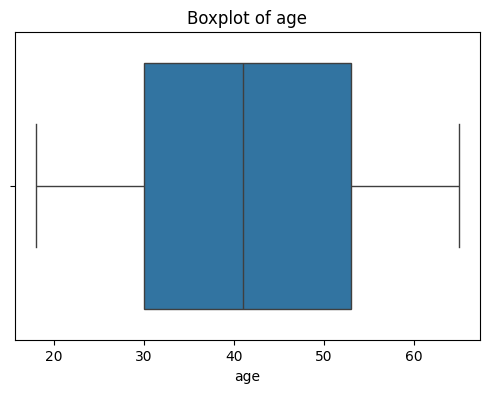

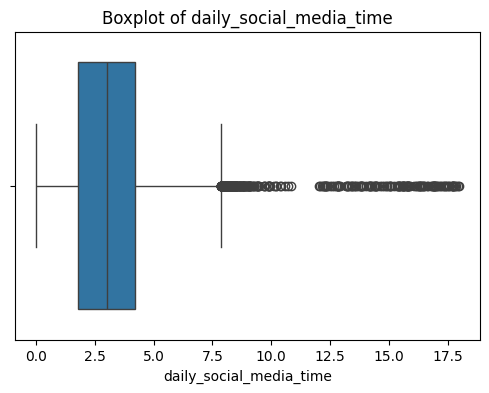

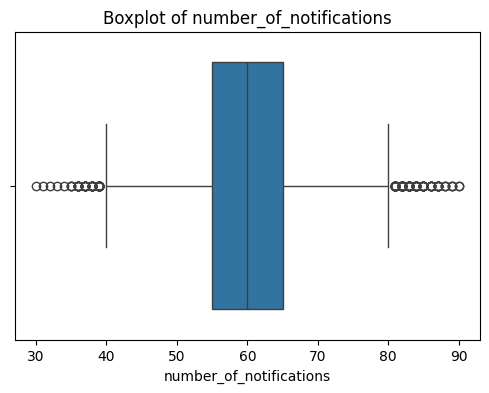

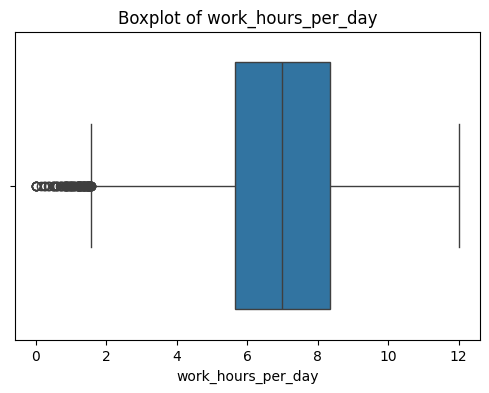

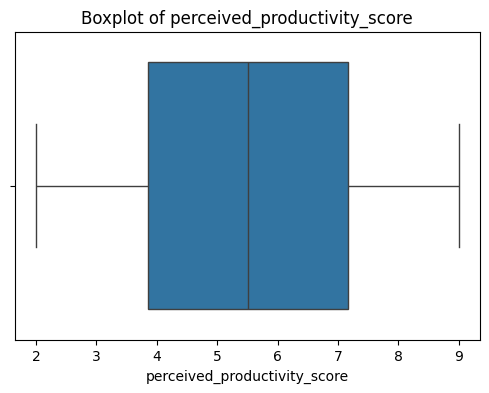

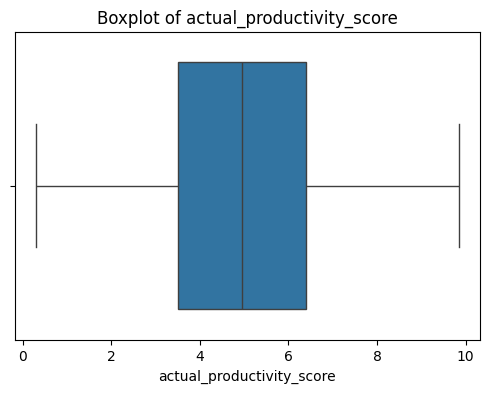

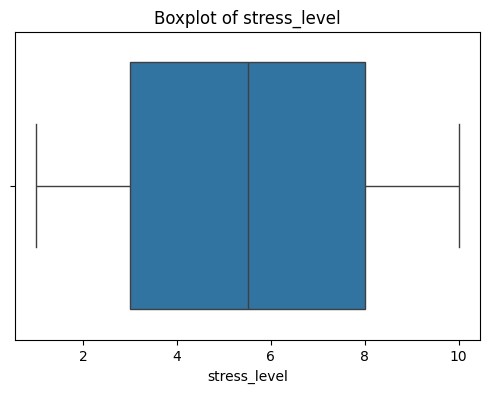

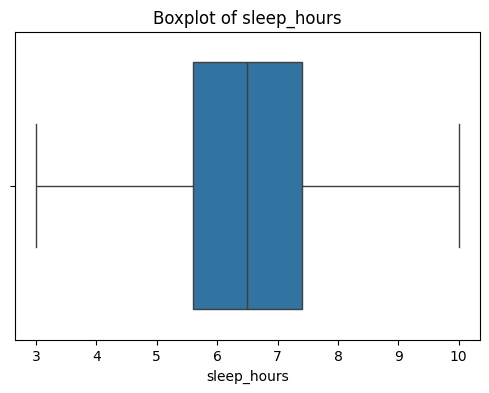

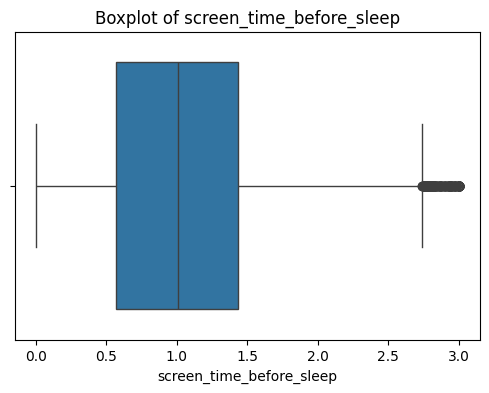

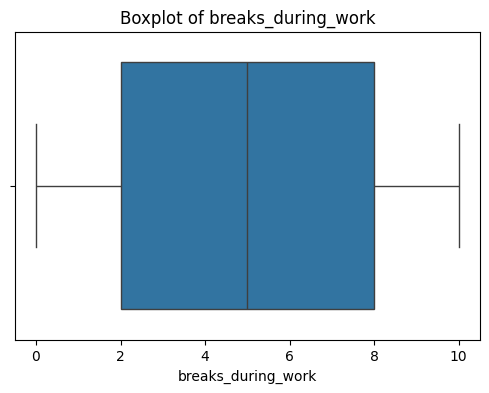

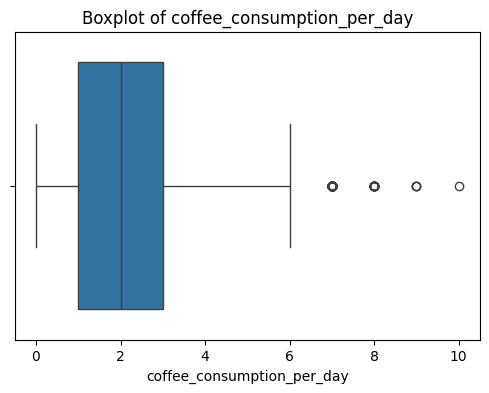

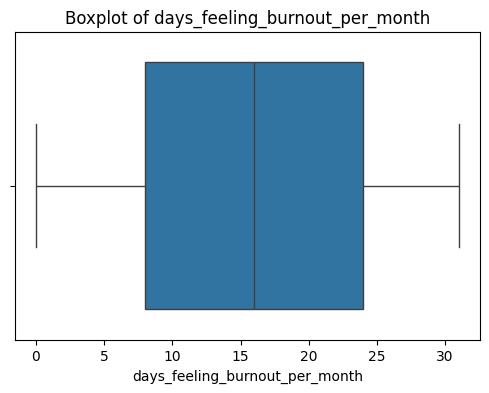

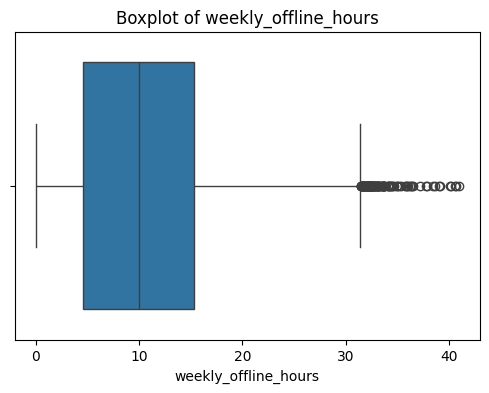

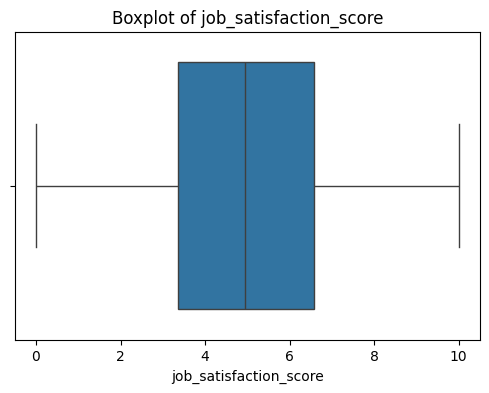

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

for col in numeric_cols:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot of {col}")
    plt.show()

Label Encoding
---

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 27270 entries, 0 to 29999
Data columns (total 19 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   age                             27270 non-null  int64  
 1   gender                          27270 non-null  object 
 2   job_type                        27270 non-null  object 
 3   daily_social_media_time         27270 non-null  float64
 4   social_platform_preference      27270 non-null  object 
 5   number_of_notifications         27270 non-null  int64  
 6   work_hours_per_day              27270 non-null  float64
 7   perceived_productivity_score    27270 non-null  float64
 8   actual_productivity_score       27270 non-null  float64
 9   stress_level                    27270 non-null  float64
 10  sleep_hours                     27270 non-null  float64
 11  screen_time_before_sleep        27270 non-null  float64
 12  breaks_during_work              27270

In [12]:
categorical_cols = ["gender", "job_type", "social_platform_preference"]

for col in categorical_cols:
    print(f"\n{col} (unique: {df[col].nunique()})")
    print(df[col].unique()[:20])


gender (unique: 3)
['Male' 'Female' 'Other']

job_type (unique: 6)
['Unemployed' 'Health' 'Finance' 'IT' 'Education' 'Student']

social_platform_preference (unique: 5)
['Facebook' 'Twitter' 'Telegram' 'TikTok' 'Instagram']


In [13]:
import pandas as pd
df = pd.get_dummies(df, columns=["gender", "job_type", "social_platform_preference"], drop_first=True)

In [14]:
df = df.astype({col: int for col in df.select_dtypes('bool').columns})

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 27270 entries, 0 to 29999
Data columns (total 27 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   age                                   27270 non-null  int64  
 1   daily_social_media_time               27270 non-null  float64
 2   number_of_notifications               27270 non-null  int64  
 3   work_hours_per_day                    27270 non-null  float64
 4   perceived_productivity_score          27270 non-null  float64
 5   actual_productivity_score             27270 non-null  float64
 6   stress_level                          27270 non-null  float64
 7   sleep_hours                           27270 non-null  float64
 8   screen_time_before_sleep              27270 non-null  float64
 9   breaks_during_work                    27270 non-null  int64  
 10  uses_focus_apps                       27270 non-null  int64  
 11  has_digital_wellbein

Feature Selection
---

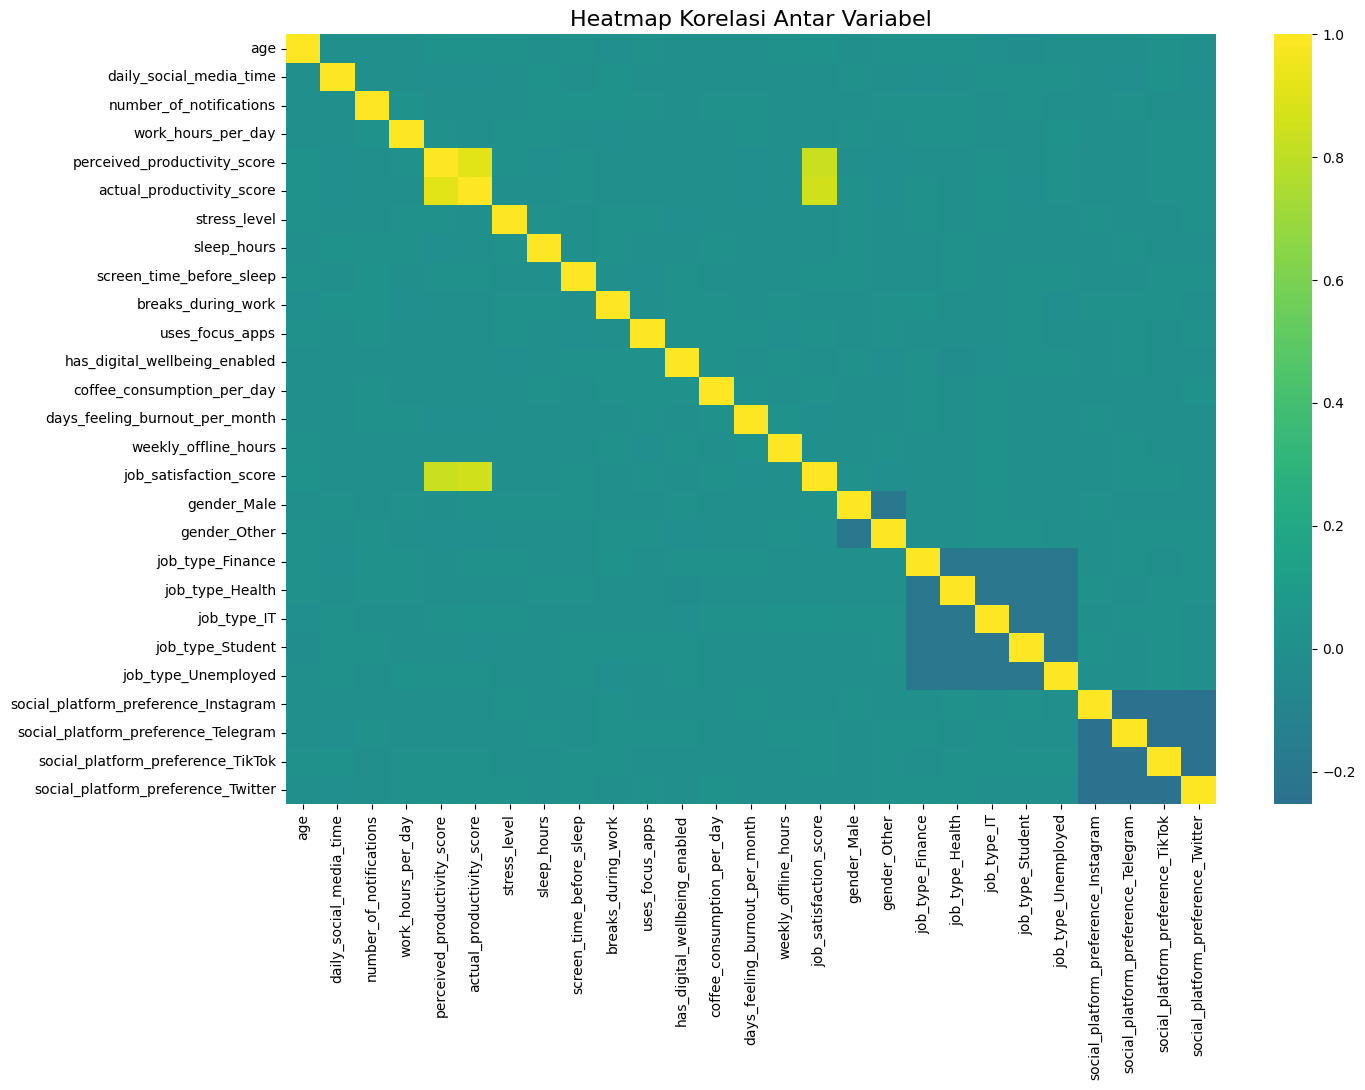

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

corr = df.corr()

plt.figure(figsize=(15,10))
sns.heatmap(corr, annot=False, cmap="viridis", center=0)
plt.title("Heatmap Korelasi Antar Variabel", fontsize=16)
plt.show()

Analisis Korelasi Target Variables
---

In [24]:
target_corr = df[['perceived_productivity_score', 'actual_productivity_score']].corr()
print("Korelasi antara Perceived dan Actual Productivity Score:")
print(target_corr)

Korelasi antara Perceived dan Actual Productivity Score:
                              perceived_productivity_score  \
perceived_productivity_score                      1.000000   
actual_productivity_score                         0.902387   

                              actual_productivity_score  
perceived_productivity_score                   0.902387  
actual_productivity_score                      1.000000  


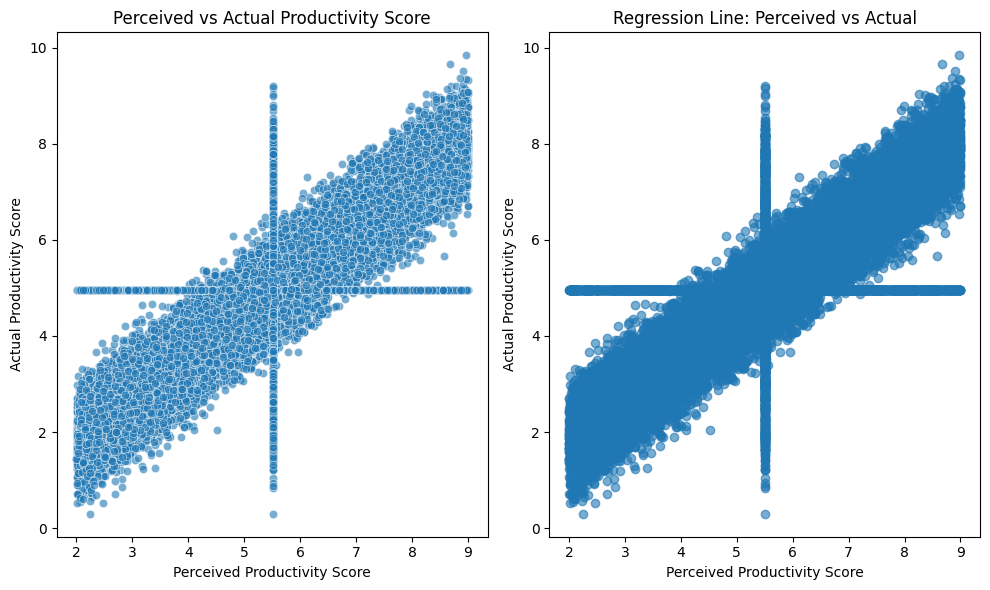

In [25]:
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
sns.scatterplot(data=df, x='perceived_productivity_score', y='actual_productivity_score', alpha=0.6)
plt.title('Perceived vs Actual Productivity Score')
plt.xlabel('Perceived Productivity Score')
plt.ylabel('Actual Productivity Score')

plt.subplot(1, 2, 2)
sns.regplot(data=df, x='perceived_productivity_score', y='actual_productivity_score', scatter_kws={'alpha':0.6})
plt.title('Regression Line: Perceived vs Actual')
plt.xlabel('Perceived Productivity Score')
plt.ylabel('Actual Productivity Score')

plt.tight_layout()
plt.show()

Distribusi Variabel Numerik
---

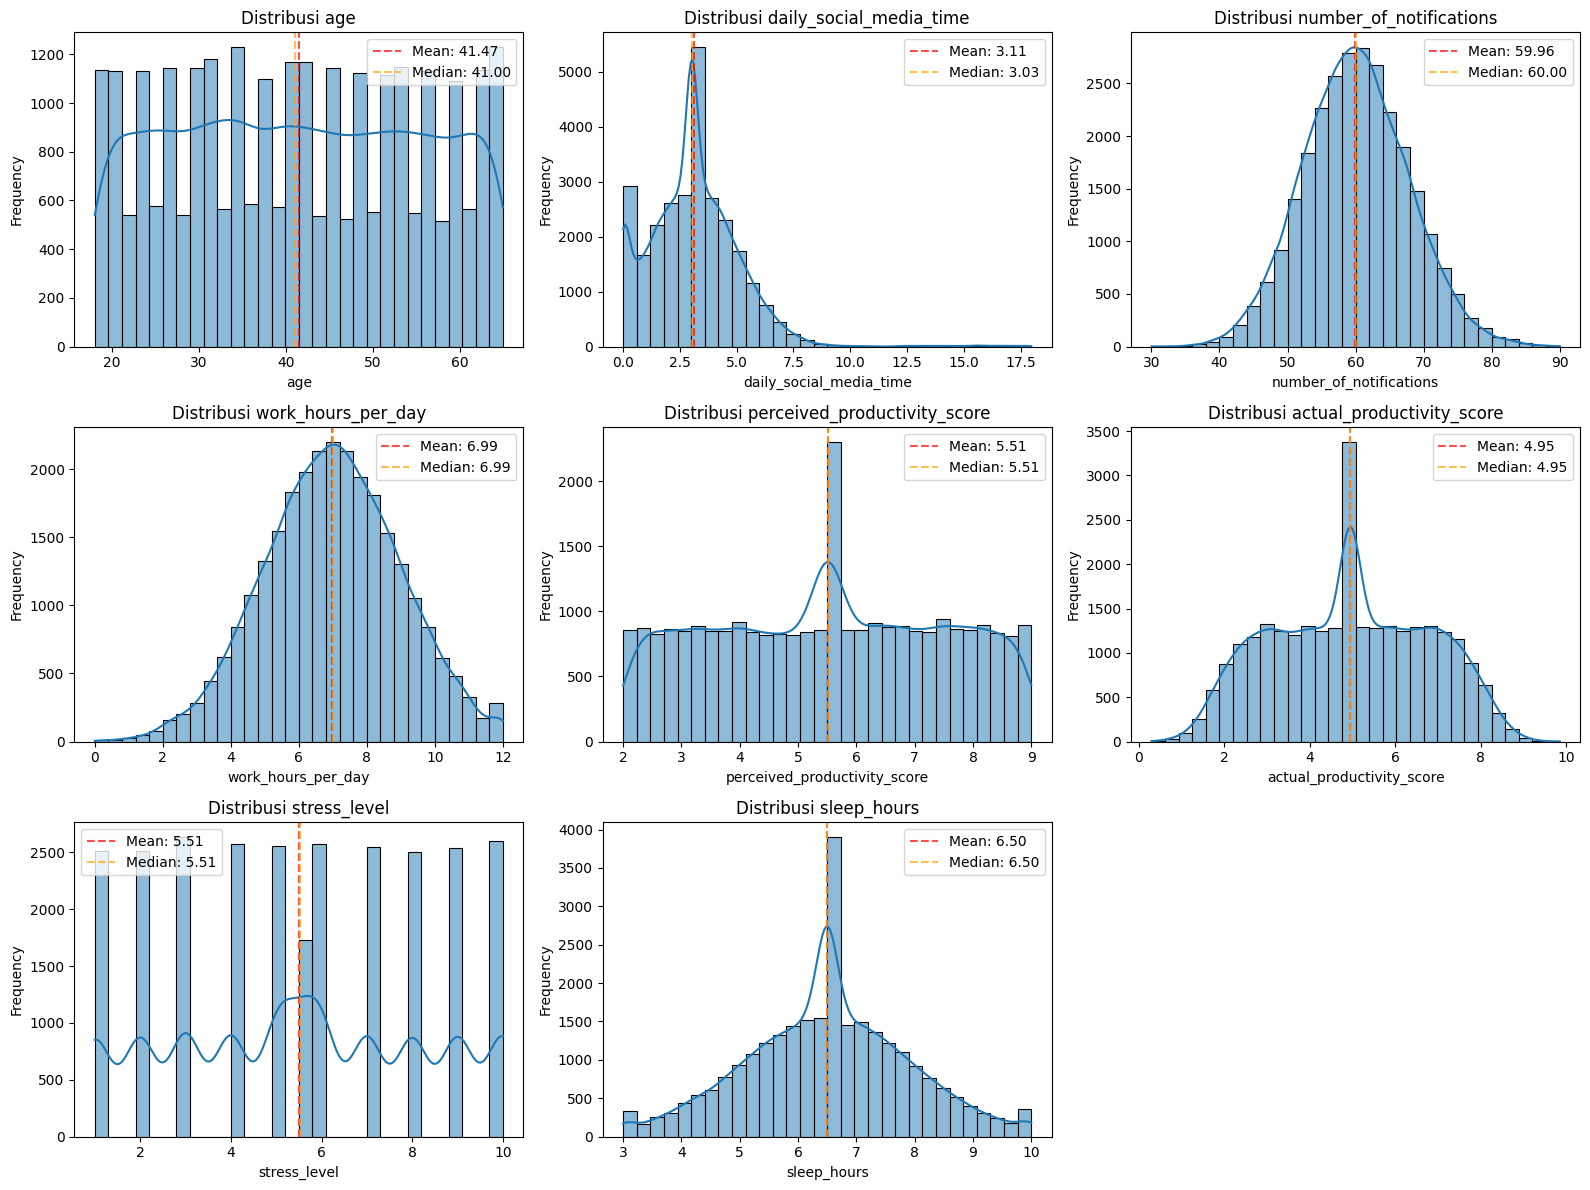

In [26]:
key_numeric_cols = ['age', 'daily_social_media_time', 'number_of_notifications',
                   'work_hours_per_day', 'perceived_productivity_score',
                   'actual_productivity_score', 'stress_level', 'sleep_hours']

plt.figure(figsize=(16, 12))
for i, col in enumerate(key_numeric_cols, 1):
    plt.subplot(3, 3, i)
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Distribusi {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

    # Tambahkan statistik deskriptif
    mean_val = df[col].mean()
    median_val = df[col].median()
    plt.axvline(mean_val, color='red', linestyle='--', alpha=0.7, label=f'Mean: {mean_val:.2f}')
    plt.axvline(median_val, color='orange', linestyle='--', alpha=0.7, label=f'Median: {median_val:.2f}')
    plt.legend()

plt.tight_layout()
plt.show()

Analisis Berdasarkan Kategori
---

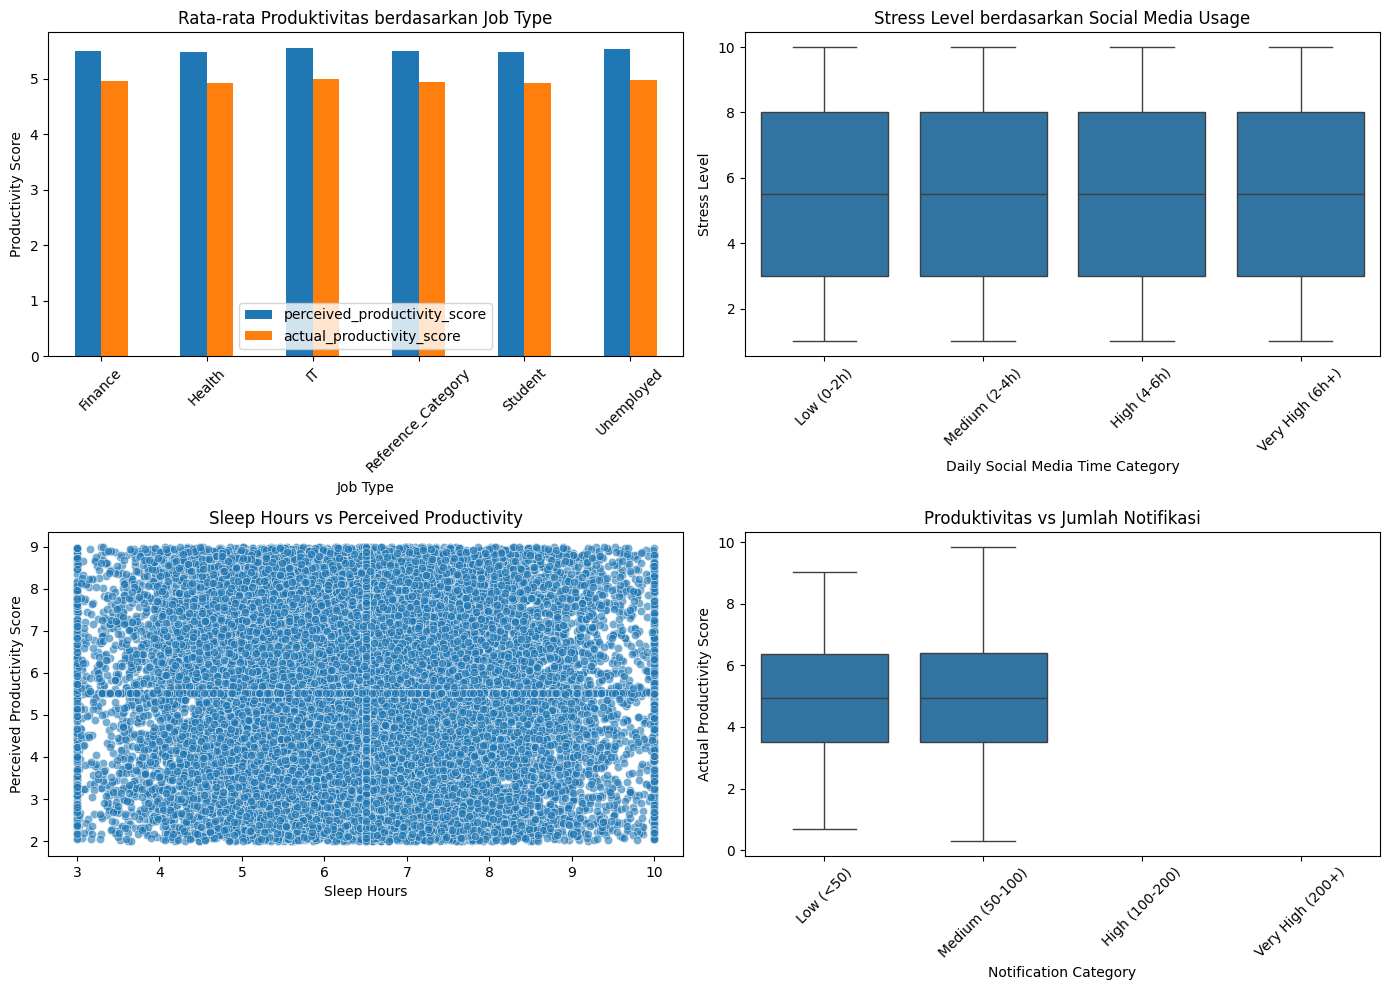

In [28]:
# Analisis berdasarkan job type (sebelum encoding)
df_temp = df.copy()

job_type_cols = [col for col in df.columns if col.startswith('job_type_')]
if job_type_cols:
    job_mapping = {}
    for col in job_type_cols:
        job_name = col.replace('job_type_', '')
        df_temp.loc[df[col] == 1, 'job_category'] = job_name

    df_temp['job_category'] = df_temp['job_category'].fillna('Reference_Category')

# Produktivitas berdasarkan kategori pekerjaan
plt.figure(figsize=(14, 10))

plt.subplot(2, 2, 1)
if 'job_category' in df_temp.columns:
    job_productivity = df_temp.groupby('job_category')[['perceived_productivity_score', 'actual_productivity_score']].mean()
    job_productivity.plot(kind='bar', ax=plt.gca())
    plt.title('Rata-rata Produktivitas berdasarkan Job Type')
    plt.xlabel('Job Type')
    plt.ylabel('Productivity Score')
    plt.xticks(rotation=45)
    plt.legend()

# Stress level berdasarkan social media time
plt.subplot(2, 2, 2)
df_temp['social_media_category'] = pd.cut(df['daily_social_media_time'],
                                         bins=[0, 2, 4, 6, float('inf')],
                                         labels=['Low (0-2h)', 'Medium (2-4h)', 'High (4-6h)', 'Very High (6h+)'])

sns.boxplot(data=df_temp, x='social_media_category', y='stress_level')
plt.title('Stress Level berdasarkan Social Media Usage')
plt.xlabel('Daily Social Media Time Category')
plt.ylabel('Stress Level')
plt.xticks(rotation=45)

# Sleep hours vs productivity
plt.subplot(2, 2, 3)
sns.scatterplot(data=df, x='sleep_hours', y='perceived_productivity_score', alpha=0.6)
plt.title('Sleep Hours vs Perceived Productivity')
plt.xlabel('Sleep Hours')
plt.ylabel('Perceived Productivity Score')

# Notification impact
plt.subplot(2, 2, 4)
df_temp['notification_category'] = pd.cut(df['number_of_notifications'],
                                         bins=[0, 50, 100, 200, float('inf')],
                                         labels=['Low (<50)', 'Medium (50-100)', 'High (100-200)', 'Very High (200+)'])

sns.boxplot(data=df_temp, x='notification_category', y='actual_productivity_score')
plt.title('Produktivitas vs Jumlah Notifikasi')
plt.xlabel('Notification Category')
plt.ylabel('Actual Productivity Score')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

Feature Importance Analysis
---

In [29]:
target_cols = ['perceived_productivity_score', 'actual_productivity_score']

print("KORELASI TERTINGGI DENGAN PRODUCTIVITY SCORES\n")

for target in target_cols:
    print(f"\nTop 10 fitur berkorelasi dengan {target}:")
    correlations = df.corr()[target].abs().sort_values(ascending=False)
    # Exclude target itself
    correlations = correlations[correlations.index != target]
    print(correlations.head(10))

KORELASI TERTINGGI DENGAN PRODUCTIVITY SCORES


Top 10 fitur berkorelasi dengan perceived_productivity_score:
actual_productivity_score         0.902387
job_satisfaction_score            0.830219
gender_Other                      0.012589
days_feeling_burnout_per_month    0.012251
daily_social_media_time           0.012093
age                               0.011998
job_type_IT                       0.010993
sleep_hours                       0.010897
has_digital_wellbeing_enabled     0.007576
job_type_Student                  0.006339
Name: perceived_productivity_score, dtype: float64

Top 10 fitur berkorelasi dengan actual_productivity_score:
perceived_productivity_score      0.902387
job_satisfaction_score            0.848425
age                               0.012602
job_type_IT                       0.012548
daily_social_media_time           0.011591
days_feeling_burnout_per_month    0.011260
gender_Other                      0.010636
job_type_Student                  0.008924
has_d

/tmp/ipython-input-3571557078.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=correlations.values, y=correlations.index, ax=axes[i], palette='viridis')
/tmp/ipython-input-3571557078.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=correlations.values, y=correlations.index, ax=axes[i], palette='viridis')


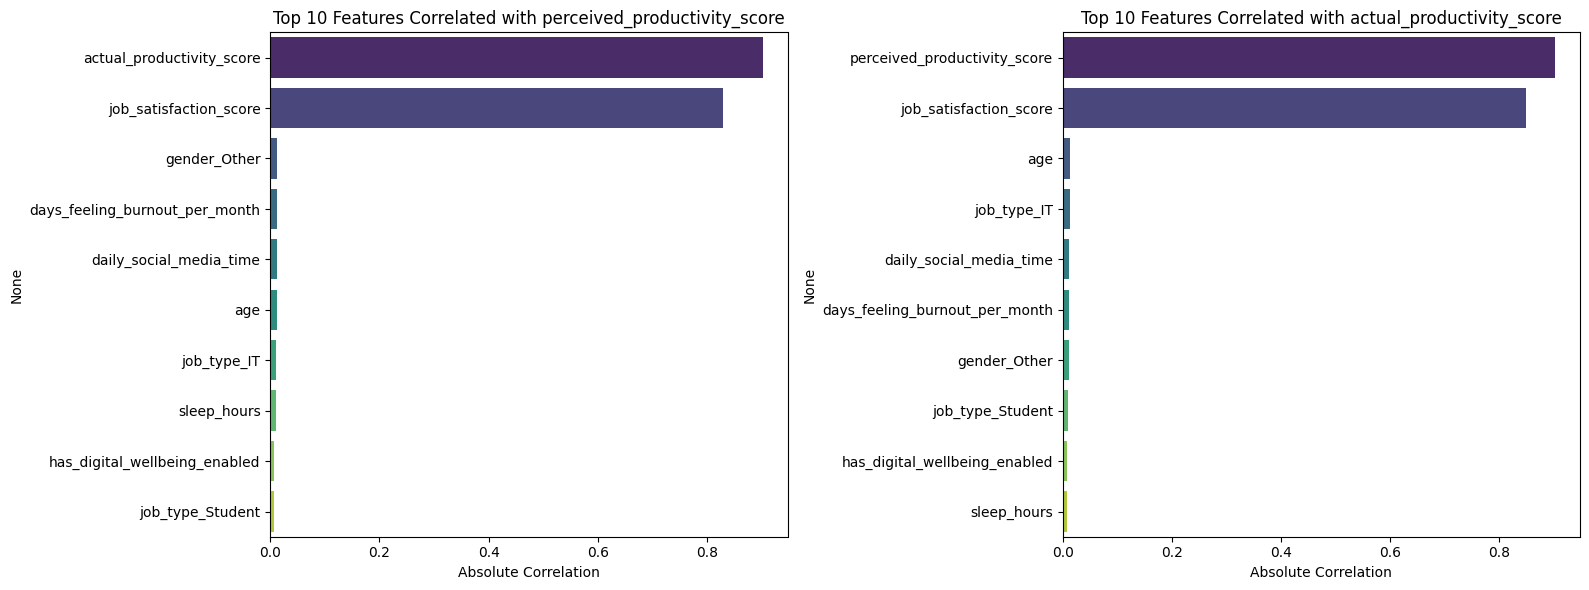

In [30]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

for i, target in enumerate(target_cols):
    correlations = df.corr()[target].abs().sort_values(ascending=False)
    correlations = correlations[correlations.index != target].head(10)

    sns.barplot(x=correlations.values, y=correlations.index, ax=axes[i], palette='viridis')
    axes[i].set_title(f'Top 10 Features Correlated with {target}')
    axes[i].set_xlabel('Absolute Correlation')

plt.tight_layout()
plt.show()